In [1]:
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.visualization import plot_histogram

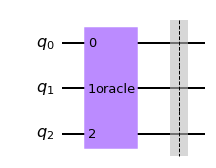

In [4]:
oracle_matrix = [
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],

]

oracle = QuantumCircuit(3)
oracle.unitary(oracle_matrix, qubits=[0, 1, 2], label='oracle')
oracle.barrier()
display(oracle.draw('mpl'))
# incomplete